In [3]:
import numpy as np
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
#Load dataset
iris = load_iris()
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

C:\Users\acer\AppData\Local\Temp\ipykernel_12400\3545130805.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X_twoFeature[y == 0, 0], y=X_twoFeature[y == 0, 1], c=cmap(0), marker=markers[0], label=[iris.target_names[0]])
C:\Users\acer\AppData\Local\Temp\ipykernel_12400\3545130805.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X_twoFeature[y == 1, 0], y=X_twoFeature[y == 1, 1], c=cmap(1), m

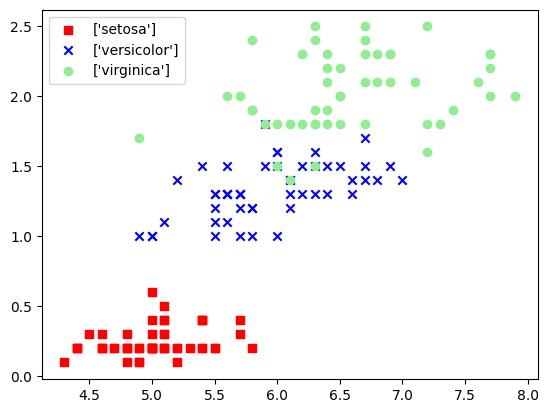

In [51]:
# X_twoFeature = iris.data[:, [0,1]]  # we only take the first two features.
X_twoFeature = iris.data[:, [0,3]] 
y = iris.target
markers = ('s', 'x', 'o')
colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.scatter(x=X_twoFeature[y == 0, 0], y=X_twoFeature[y == 0, 1], c=cmap(0), marker=markers[0], label=[iris.target_names[0]])
plt.scatter(x=X_twoFeature[y == 1, 0], y=X_twoFeature[y == 1, 1], c=cmap(1), marker=markers[1], label=[iris.target_names[1]])
plt.scatter(x=X_twoFeature[y == 2, 0], y=X_twoFeature[y == 2, 1], c=cmap(2), marker=markers[2], label=[iris.target_names[2]])
plt.legend()

In [13]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [15]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [52]:
X_iris = iris.data
Y_iris = iris.target
print(Y_iris)
print(X_iris.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)


In [7]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
iris_df.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
dtype: int64

In [11]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [16]:
iris_df.isnull().values.any()

False

In [25]:
#Mã hóa biến mục tiêu
from sklearn.calibration import LabelEncoder

iris_df['class'] = iris.target
encode = LabelEncoder()
iris_df['class']=encode.fit_transform(iris_df['class'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


C:\Users\acer\AppData\Local\Temp\ipykernel_12400\2585844754.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris_df['class'],bins = 50)


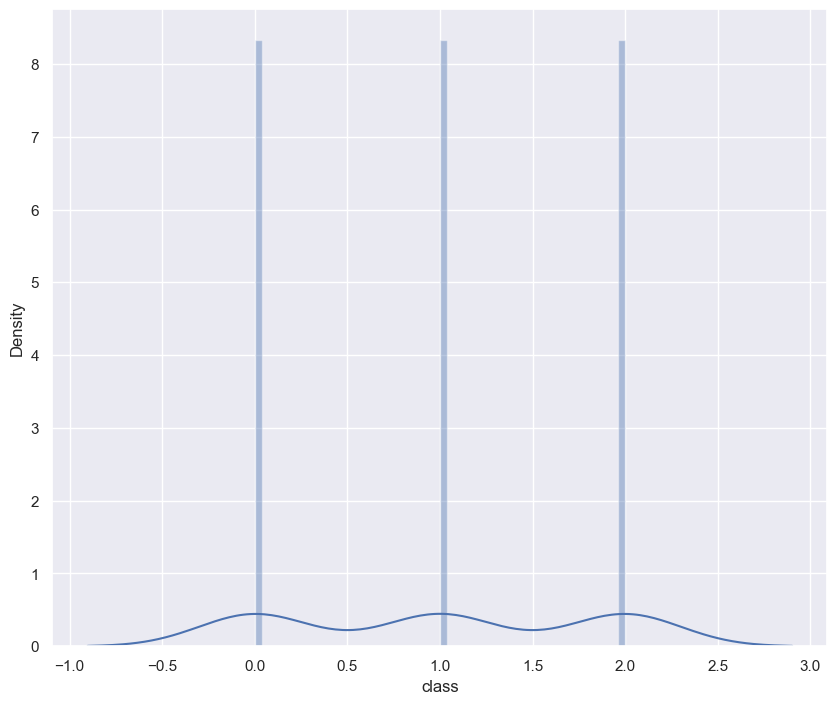

In [57]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8.27)})
sns.distplot(iris_df['class'],bins = 50)
plt.show()

<Axes: >

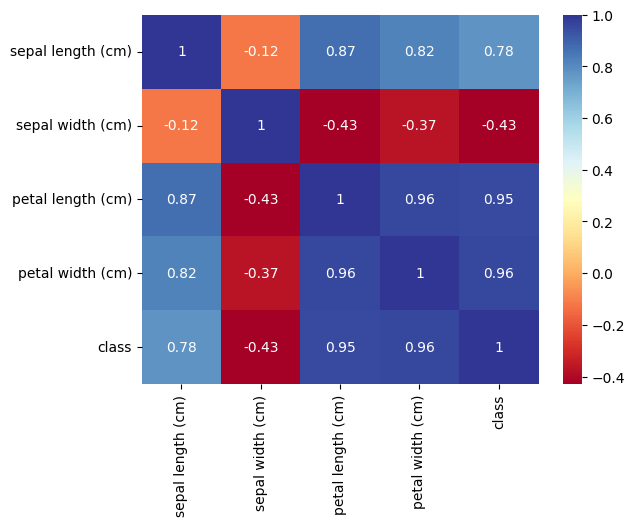

In [37]:
sns.heatmap(iris_df.corr().round(2),annot=True,cmap="RdYlBu")

In [30]:
#Chọn mục tiêu và đặc trung
X = iris_df.drop(['class'],axis =1)#Chọn tất cả trừ 'class'=>đặc trung
y = iris_df['class']#Chọn'class'=>mục tiêu

In [32]:
#Tách bộ trainning và bộ testing
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [33]:
#Thực hiện mô hình
lr = LogisticRegression()
lr.fit(X_train,y_train)#Sử dụng dữ liệu huấn luyện,tìm ra các tham số tốt nhất cho mô hình => có khả năng dự đoán chính xác nhất
y_hat = lr.predict(X_test)#sử dụng dữ liệu kiểm tra mô hình sau khi huấn luyện=>dự đoán nhãn mục tiêu tương ứng.Mô hình sẽ áp dụng các tham số đã học được từ dữ liệu huấn luyện để dự đoán nhãn của dữ liệu ktra.

In [56]:
#Đánh giá mô hình
#Chuyển đổi các dự đoán đã được mã hóa trong y_hat thành các giá trị ban đầu của nhãn mục tiêu.
print('Predicted Values on Test data:',encode.inverse_transform(y_hat))
#Tính toán độ chính xác của mô hình so với dữ liệu kiểm tra.
print("Accuracy Score:",accuracy_score(y_hat,y_test))
#y_hat là các dự đoán của mô hình trên dữ liệu kiểm tra
#y_test là các nhãn mục tiêu thực tế tương ứng.

Predicted Values on Test data: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Accuracy Score: 1.0
